In [206]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPORTING DATASET

In [96]:
import pandas as pd

# Loading from CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/feynn labs intership/task3/crops.csv')

# Print the first 5 rows of the dataset
print(df.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Out of 8 attributes 3 are numerical attributes and rest are categorical

#Descriptive statistics

In [6]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [7]:
len(df[df['N']==0])

27

In [8]:
df[df['N']==0]

N    P    K  temperature   humidity        ph    rainfall        label
346   0   65   15    23.461683  23.221976  5.645436   95.842534  kidneybeans
382   0   55   22    22.986669  20.579406  5.916779  143.858494  kidneybeans
477   0   70   21    36.300497  56.030213  4.672437  101.607399   pigeonpeas
517   0   55   25    28.174894  43.667230  4.524172   45.781728    mothbeans
608   0   49   18    29.683617  87.935981  6.990095   41.824902     mungbean
829   0   65   24    28.495844  62.446162  7.841496   53.145310       lentil
875   0   69   21    25.869282  61.883211  7.072923   36.682840       lentil
878   0   74   17    23.333759  64.505158  7.240988   47.015107       lentil
891   0   67   22    29.821121  69.407321  6.593798   51.564611       lentil
904   0   27   38    22.445813  89.901470  6.738016  109.390600  pomegranate
925   0   17   42    23.202426  91.194427  6.859841  109.094632  pomegranate
975   0    5   36    24.351938  90.886124  6.152907  105.529185  pomegranate
1104  0   21   32    35.898556  54.259642  6.430139   92.197217        mango
1179  0   17   30    35.474783  47.972305  6.279134   97.790725        mango
1184  0   36   26    34.130722  51.257862  5.101206   96.388080        mango
1243  0  137  195    22.435902  80.186121  6.329500   65.397317       grapes
1507  0  123  205    22.027754  92.961295  5.790993  121.134918        apple
1514  0  133  200    23.672877  90.493557  5.708419  104.229803        apple
1588  0  145  205    21.225034  90.098778  5.520783  113.976046        apple
1607  0   18   14    29.771494  92.007200  7.207991  114.416179       orange
1621  0   25   14    19.335168  91.979789  6.361671  116.450422       orange
1635  0   12    7    20.184323  90.654585  6.969250  116.813097       orange
1641  0   23   15    22.566642  93.374889  7.598729  109.858575       orange
1815  0   19   33    27.132601  95.237980  6.234458  204.720657      coconut
1857  0   29   32    28.059124  98.367098  5.868256  171.651640      coconut
1874  0   26   31    25.070725  95.021568  5.547933  192.903631      coconut
1878  0   19   31    25.517913  94.384206  6.271953  178.729772      coconut

above dataframe shows the observations where the Nitrogen (N) attribute is equal to zero. There are 27 such observations for different crops such as kidneybeans, pigeonpeas, mothbeans, mungbean, lentil, pomegranate, mango, grapes, apple, orange, and coconut. It indicates that for these particular crops, the Nitrogen level was not present or was too low in the soil. This could have affected the crop yield, growth, and quality.


#Exploratory analysis

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df.shape

(2200, 8)

2200 rows of data with 8 attributes

In [9]:
df['label'].nunique()

22

this says that there are 22 unique labesl/classes in output attribute

In [10]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

each of the class in out attribute has 100 rows

#Checking Null values
through heatmeap

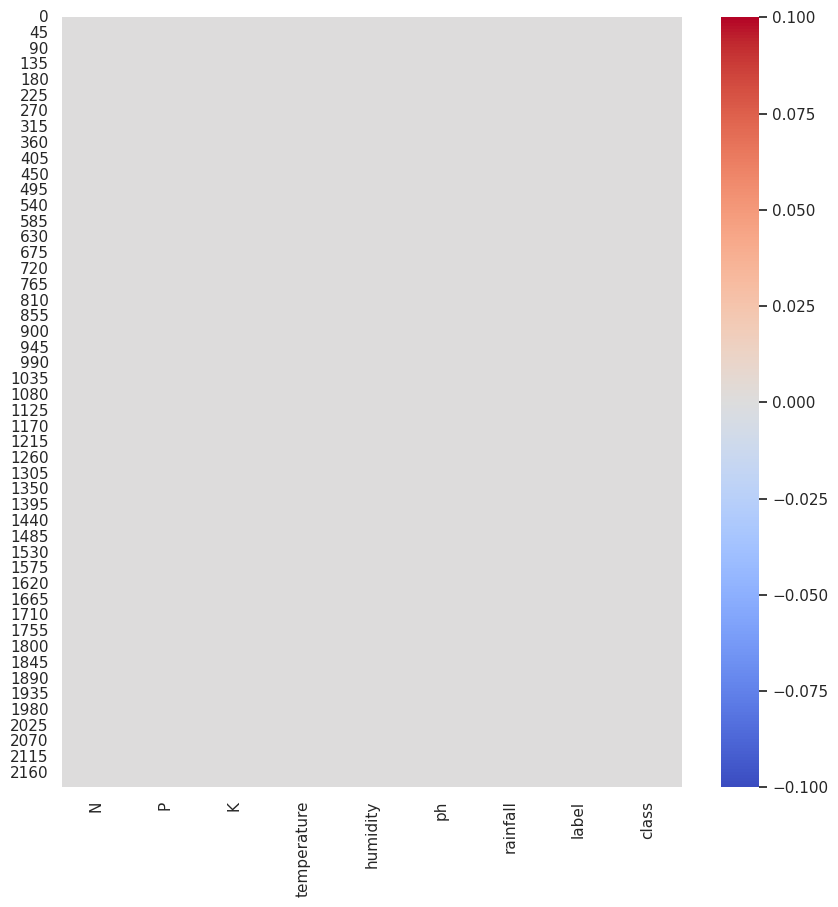

In [108]:
sns.heatmap(df.isnull(),cmap="coolwarm")
plt.show()

In [109]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
class          0
dtype: int64

there are no null values in the dataset

#Data visualization

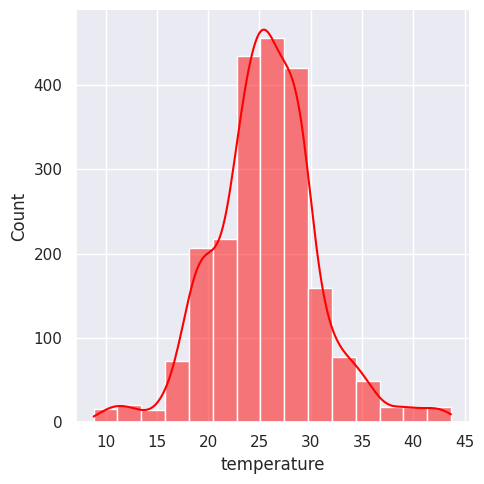

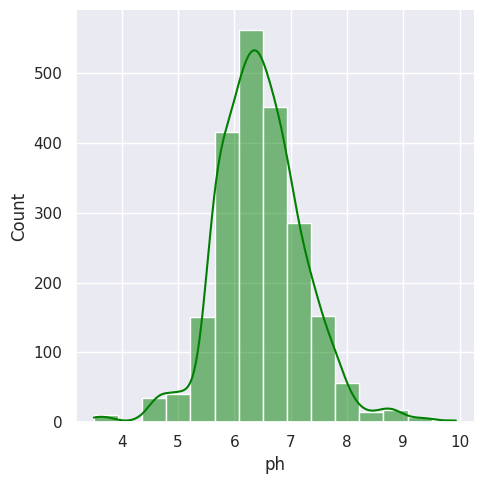

In [111]:
sns.displot(df['temperature'], kde=True, color='red', bins=15)

sns.displot(df['ph'], kde=True, color='green', bins=15)

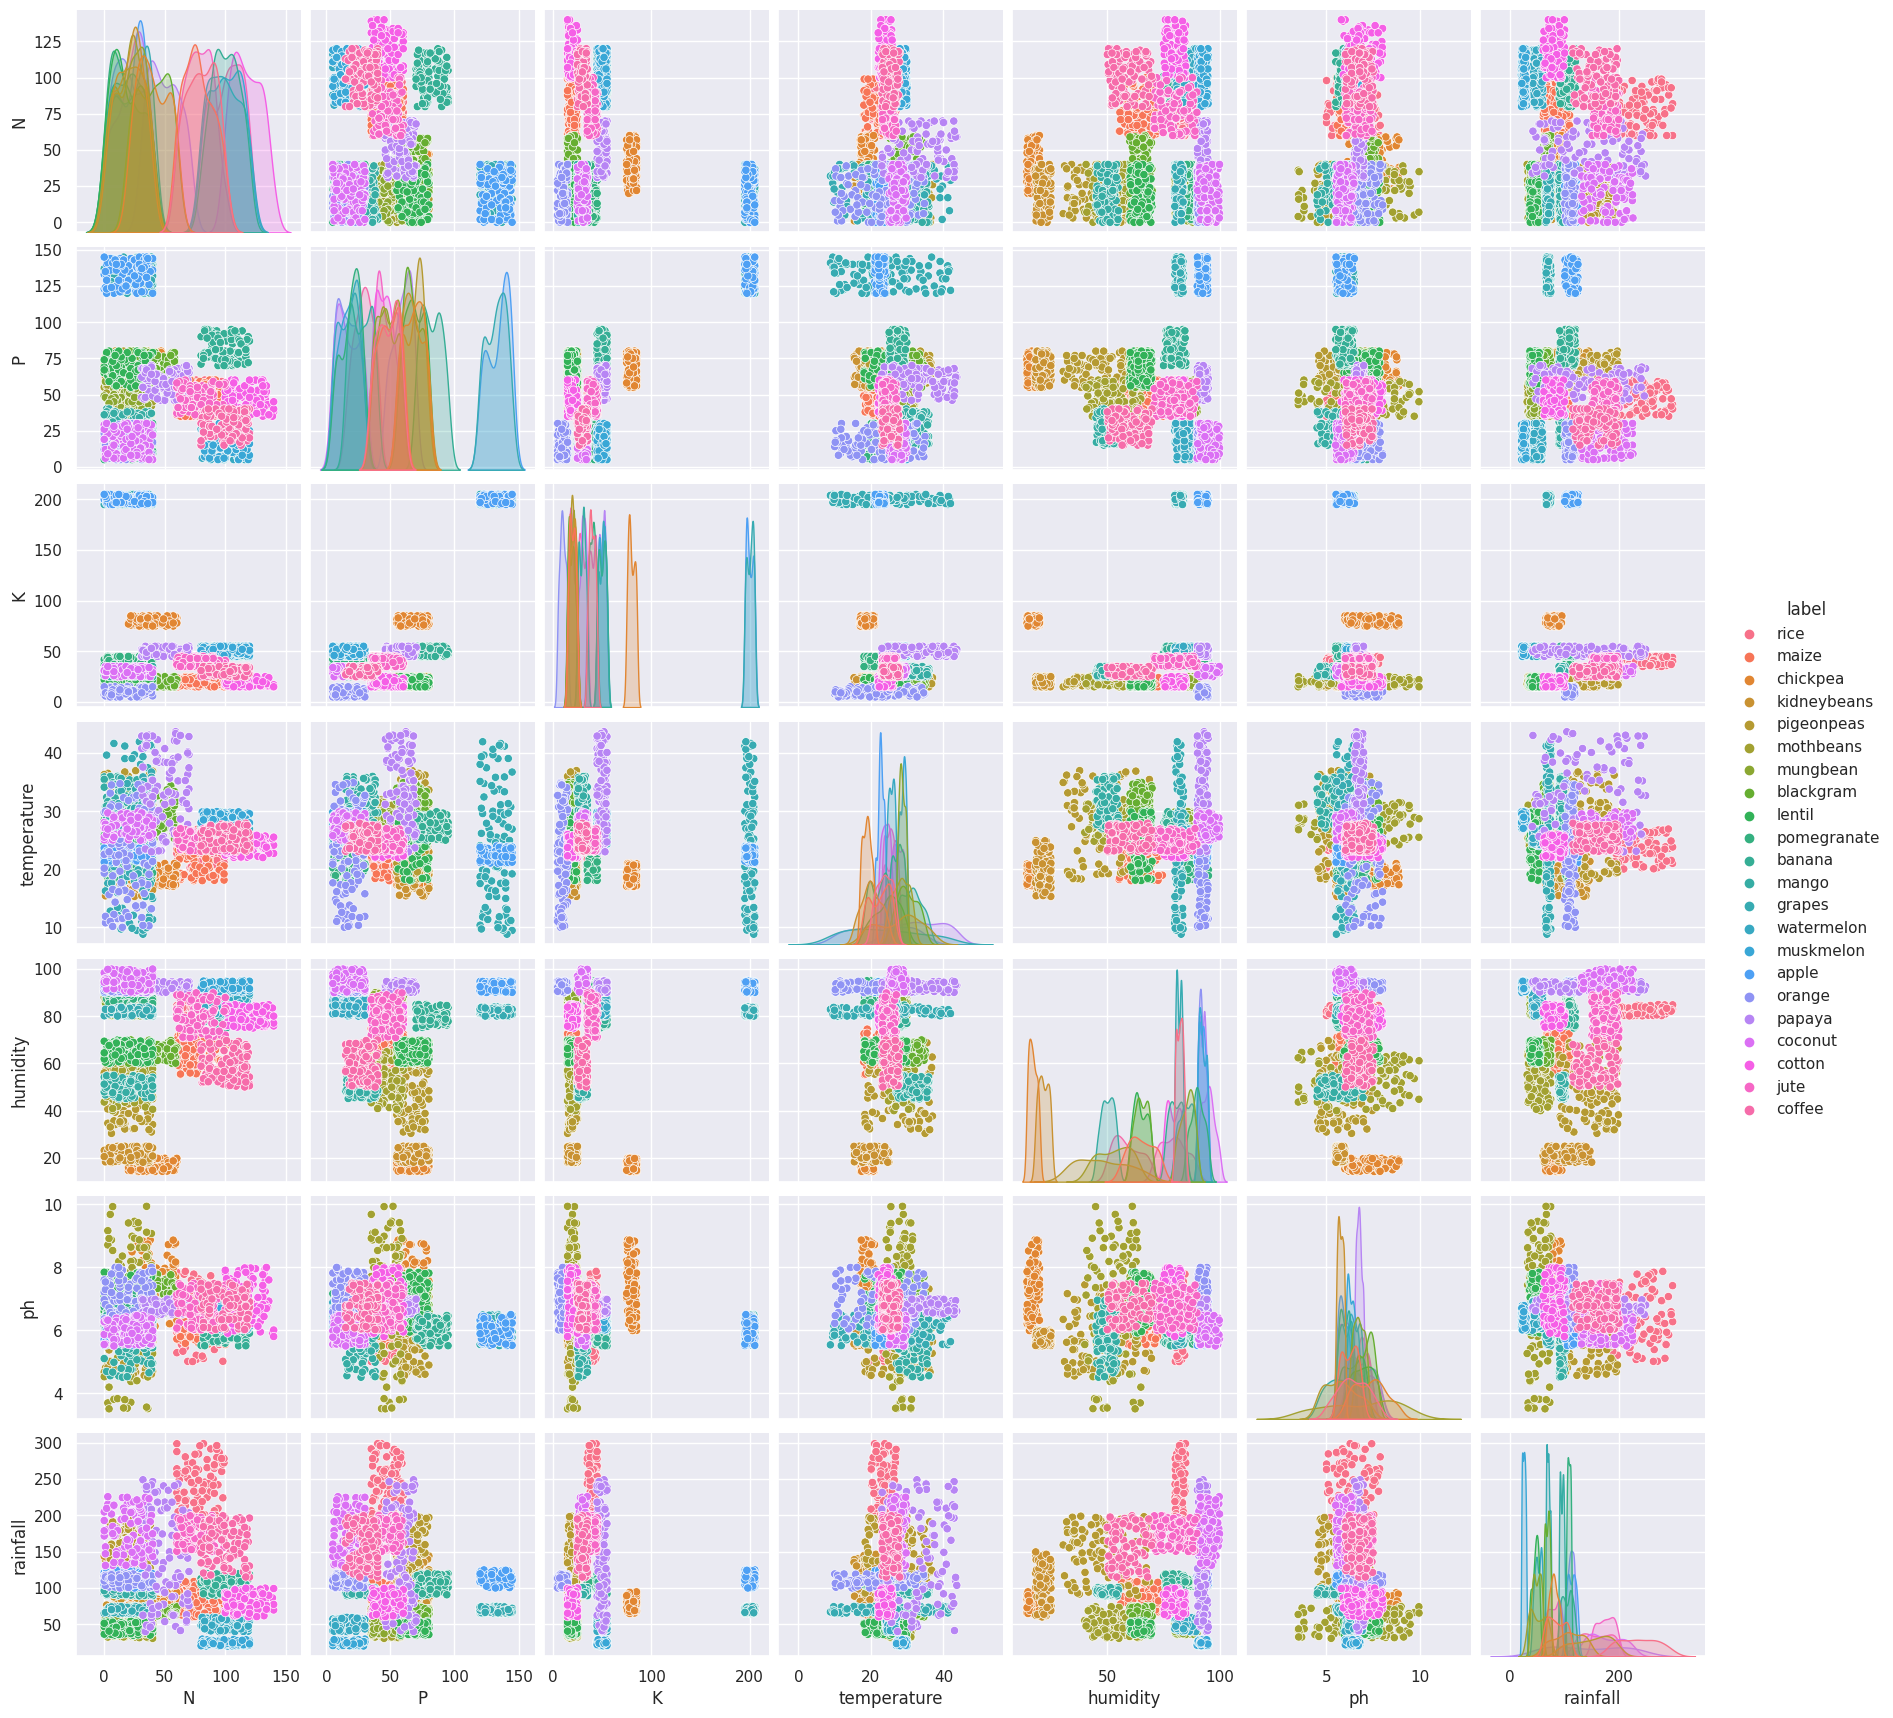

In [112]:
sns.pairplot(df,hue='label')

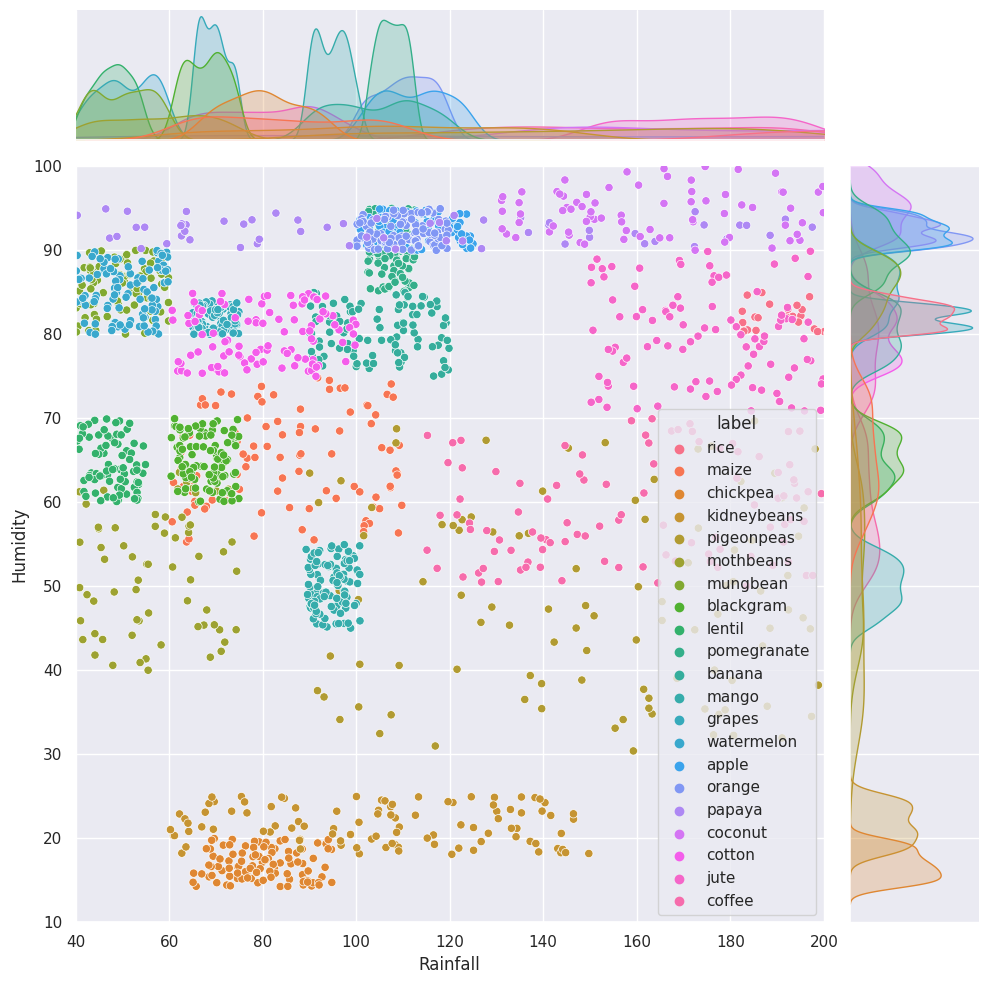

In [113]:
import seaborn as sns

# Create joint plot
g = sns.jointplot(x="rainfall", y="humidity", data=df[(df['temperature']<40) & 
                                                  (df['rainfall']>40)], height=10, hue="label")

# Set x-axis and y-axis limits
g.ax_joint.set_xlim(40, 200)
g.ax_joint.set_ylim(10, 100)

# Set axis labels
g.set_axis_labels('Rainfall', 'Humidity')


#kernel  density estimation

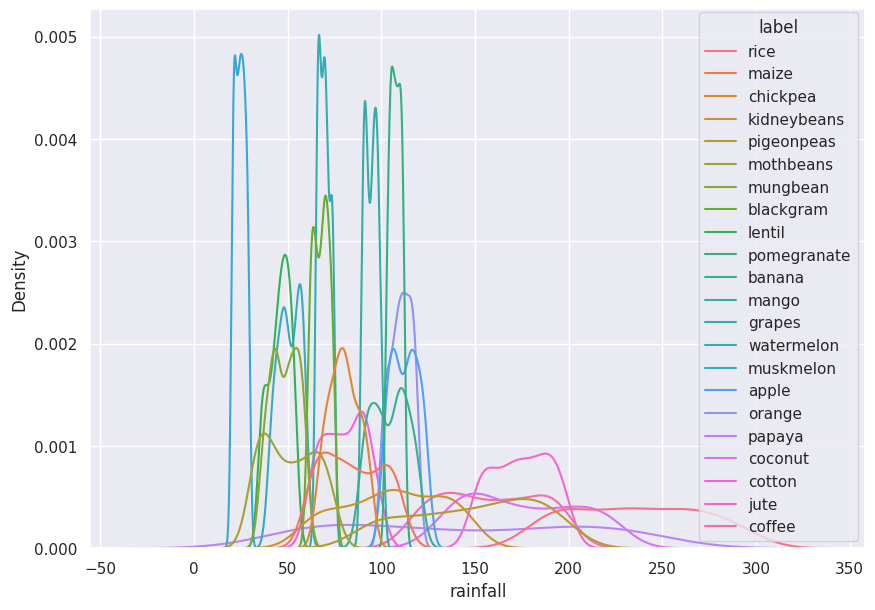

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
# Create KDE plots
sns.kdeplot(data=df, x="rainfall", hue="label")
plt.show()


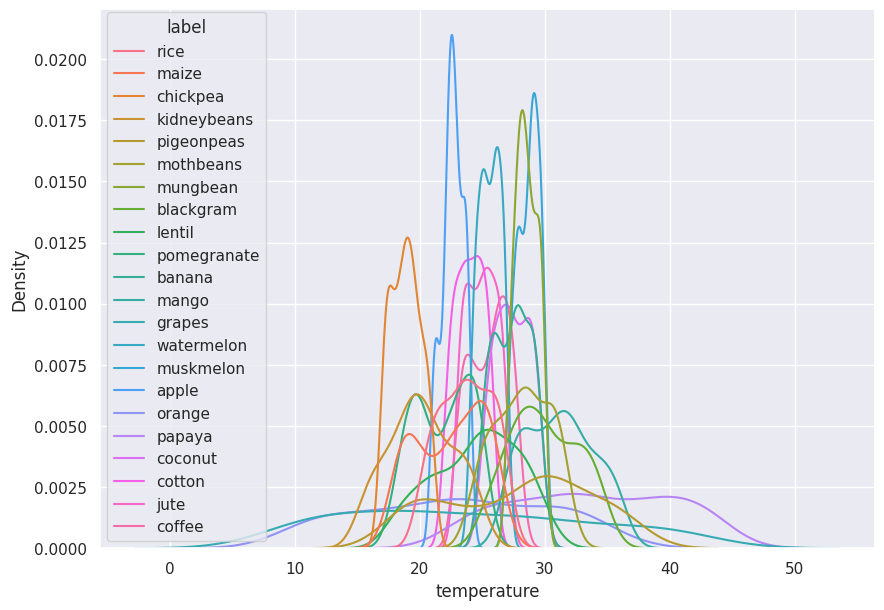

In [118]:
fig = plt.figure(figsize=(10,7))
sns.kdeplot(data=df, x="temperature", hue="label")
plt.show()


this shows how data is distributed for each of the classes in rainfall attribute

<Axes: xlabel='label', ylabel='ph'>

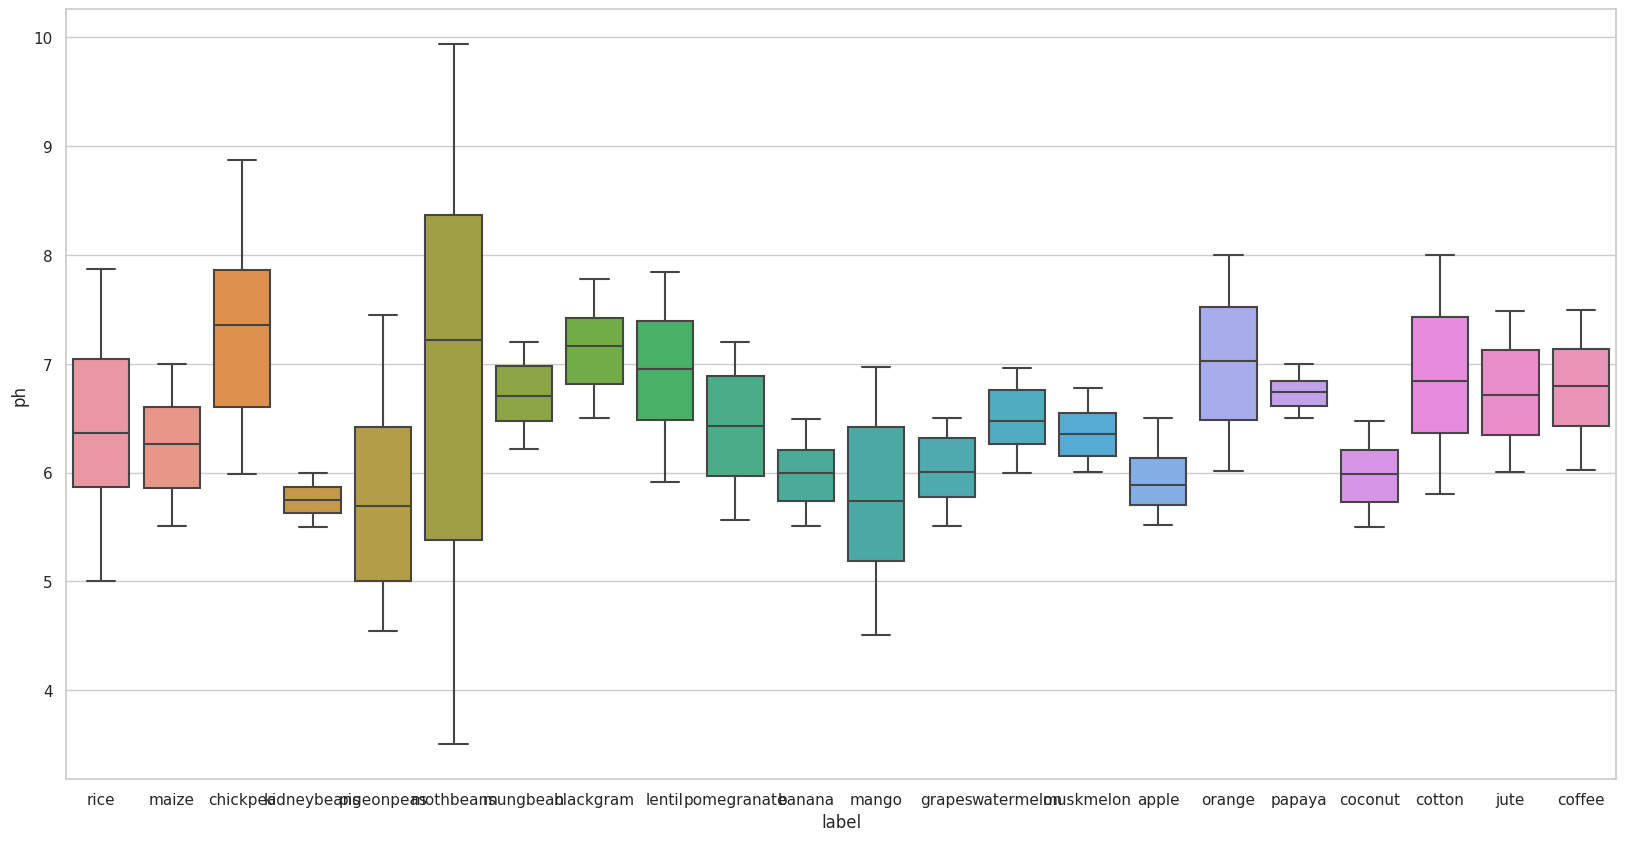

In [120]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='label',y='ph',data=df)

#Checking out the outliers

<Axes: >

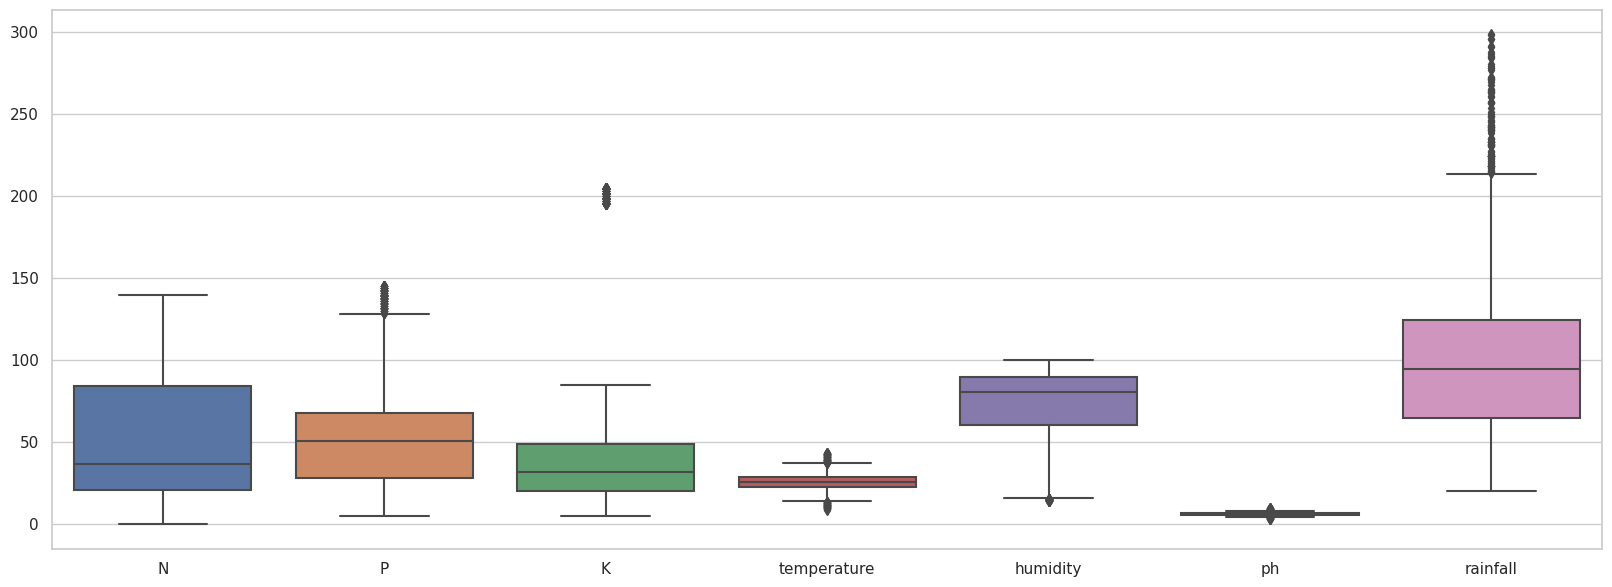

In [28]:
# Draw boxplots for all numerical columns
fig = plt.figure(figsize=(20,7))
sns.boxplot(data=df)

this shows that few attributes in the datset has outliers , which should be removed to reduce variability of the data.

In [29]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-29-62a81afb9943>:4: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



<Axes: >

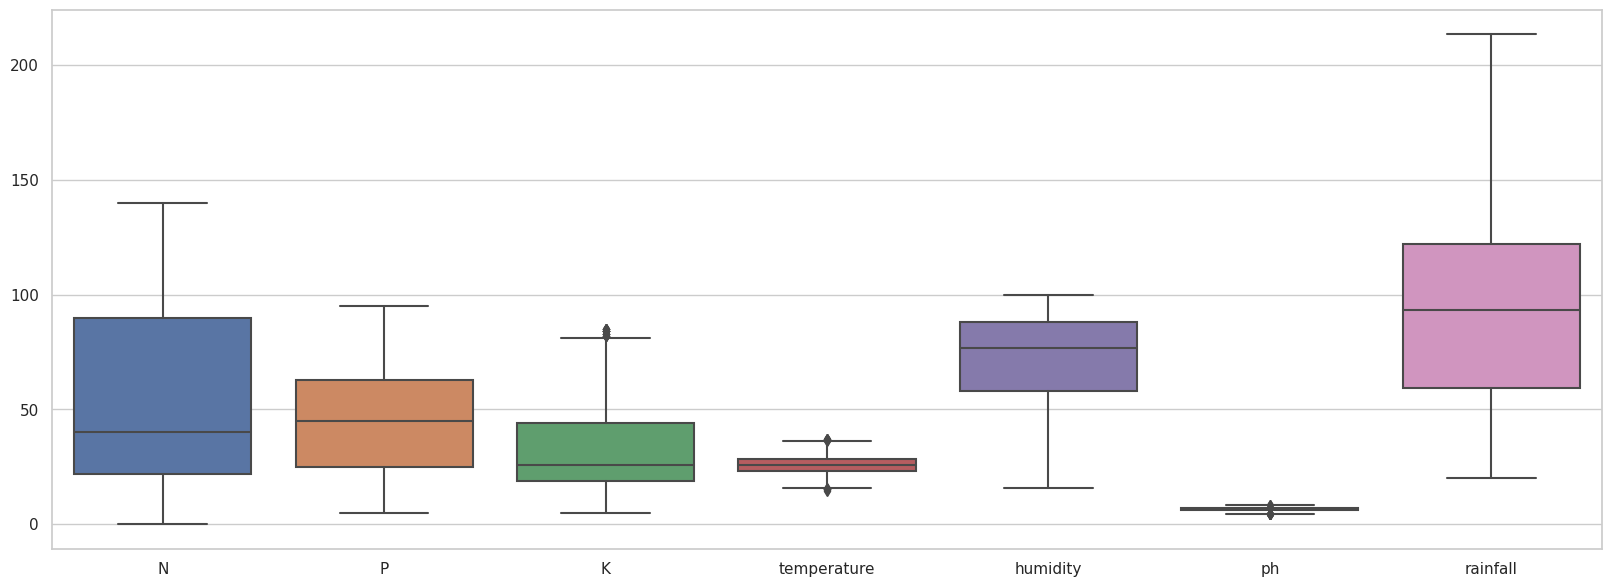

In [30]:
# Draw boxplots for all numerical columns
fig = plt.figure(figsize=(20,7))
sns.boxplot(data=df_clean)

In [124]:
len(df)-len(df_clean)

432

after removing outliers 432 rows were removed from the datset 

#Violin-Swarm plots for N-P-K

<Axes: xlabel='label', ylabel='N'>

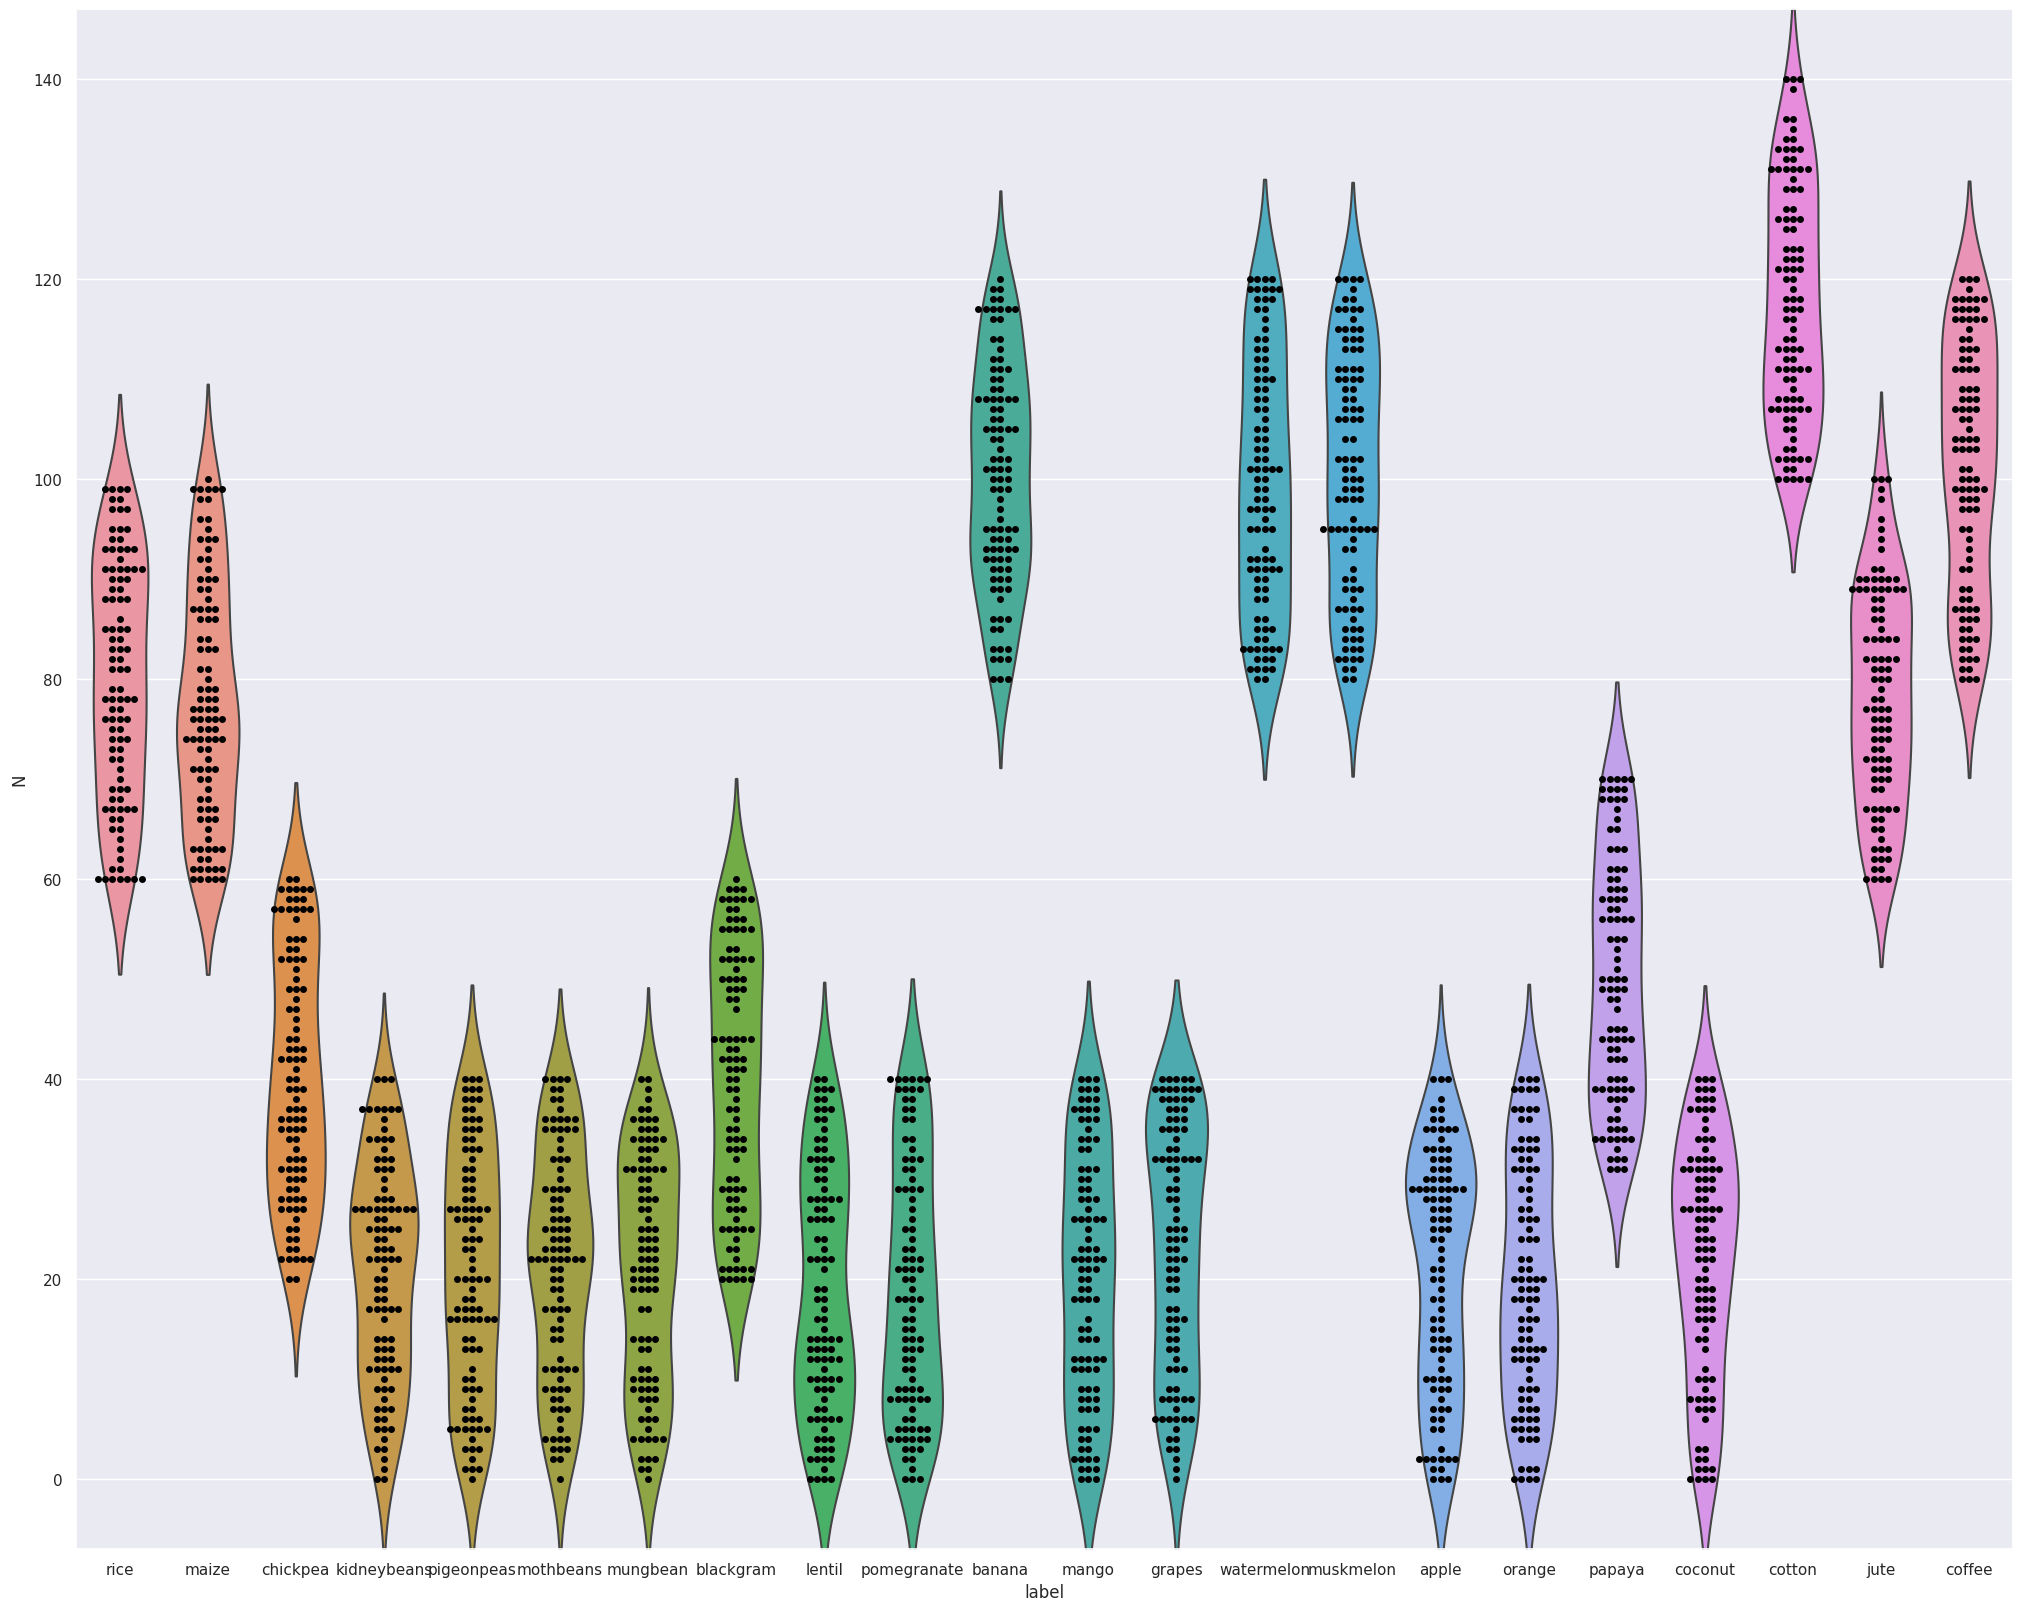

In [44]:
import seaborn as sns

sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(25,20)})

sns.violinplot(x="label", y="N", data=df, inner=None)
sns.swarmplot(x="label", y="N", data=df, color="black", edgecolor="grey")


<Axes: xlabel='label', ylabel='P'>

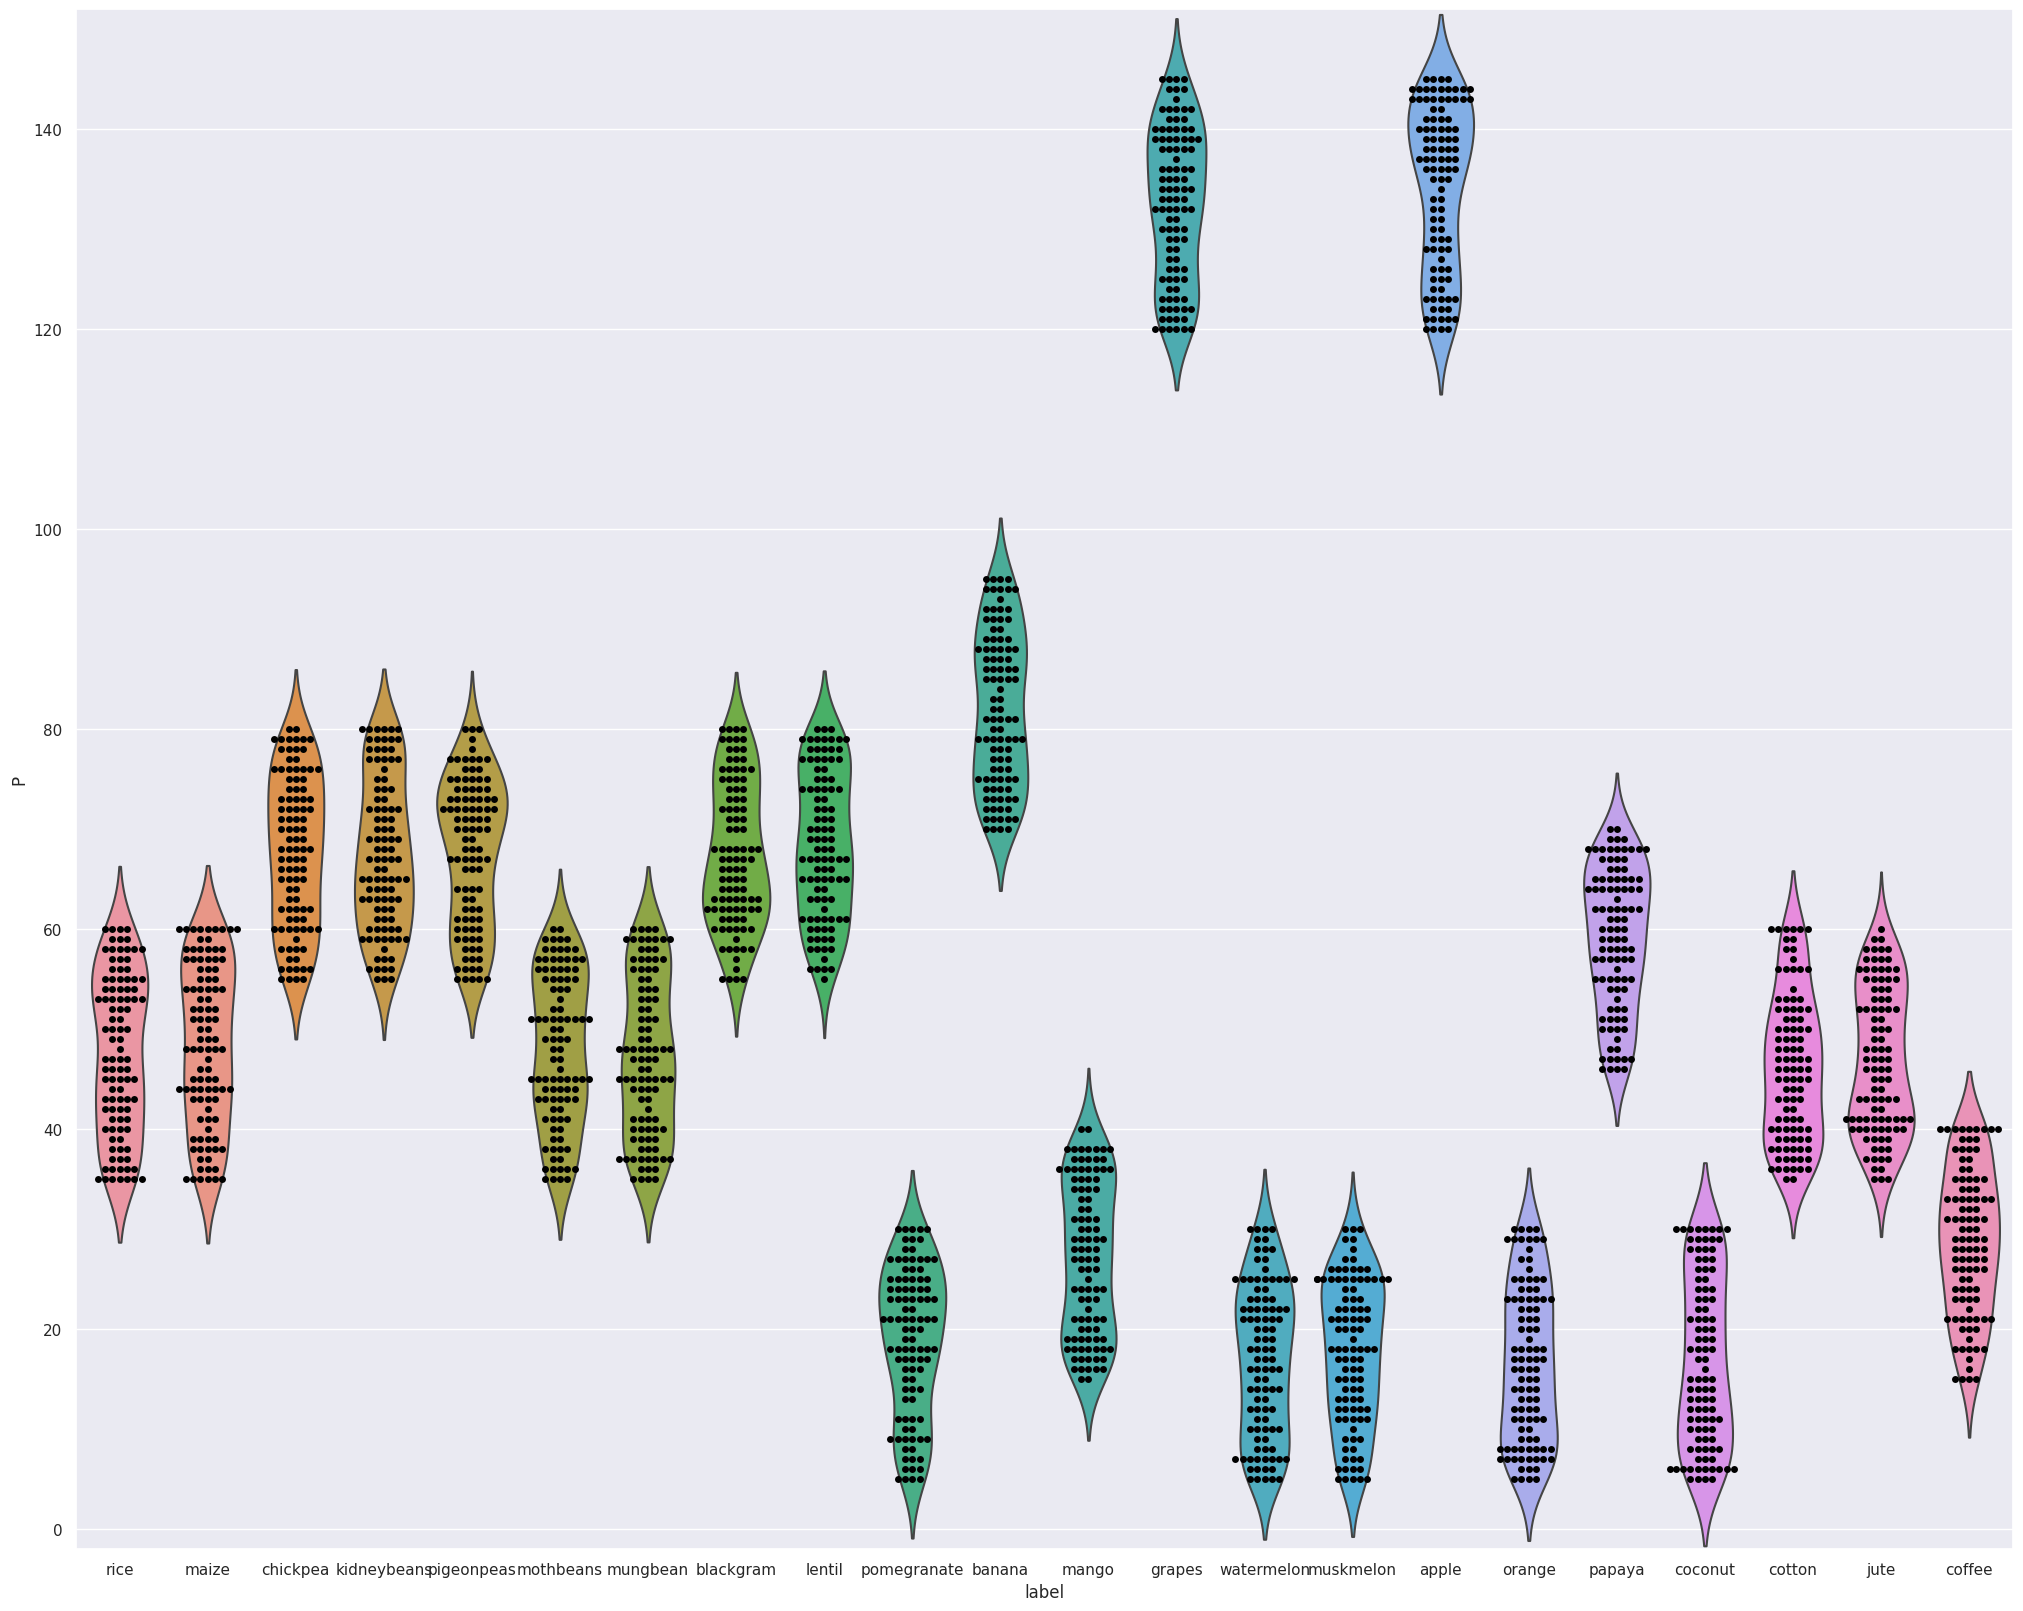

In [45]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(25,20)})

sns.violinplot(x="label", y="P", data=df, inner=None)
sns.swarmplot(x="label", y="P", data=df, color="black", edgecolor="grey")

##Joyplot

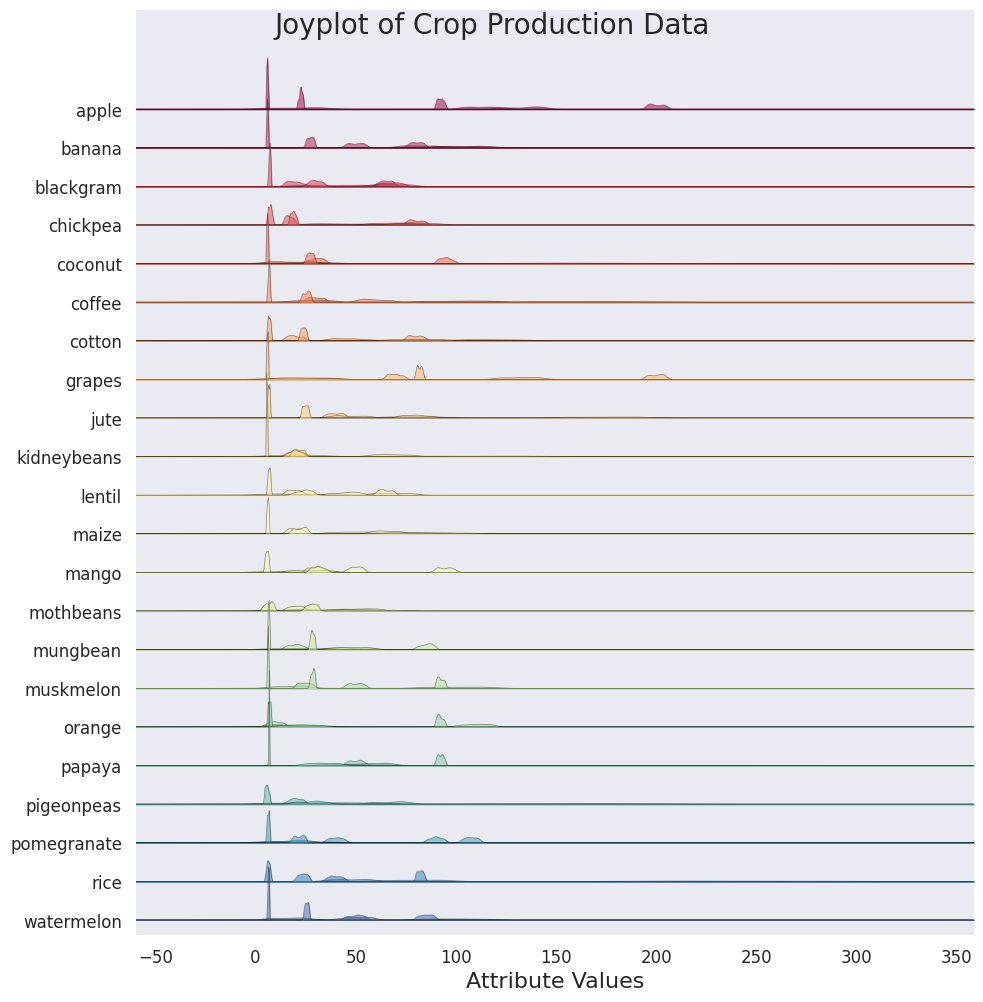

In [57]:
import joypy
# Plot the joyplot
fig, axes = joypy.joyplot(data=df, column=['K', 'N', 'P', 'humidity', 'ph', 'rainfall', 'temperature'], 
                          by="label", figsize=(10,10), xlabelsize=12, ylabelsize=12,
                          alpha=0.5, linewidth=0.5, colormap=plt.cm.Spectral)

# Set titles for the plot and axes
plt.suptitle('Joyplot of Crop Production Data', fontsize=20)
plt.xlabel('Attribute Values', fontsize=16)
plt.ylabel('Crop Type', fontsize=16)

# Show the plot
plt.show()


#Network graph

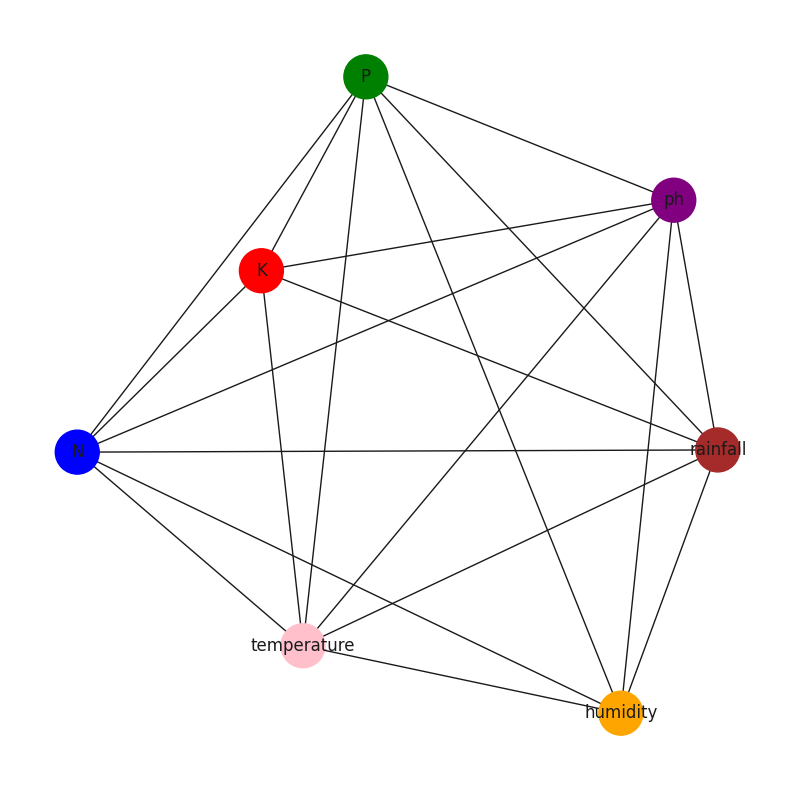

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
# Define the nodes
nodes = ['K', 'N', 'P', 'humidity', 'ph', 'rainfall', 'temperature']
node_colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']

# Define the edges
edges = [('K', 'N'), ('K', 'P'), ('K', 'ph'), ('K', 'rainfall'), ('K', 'temperature'),
         ('N', 'P'), ('N', 'humidity'), ('N', 'ph'), ('N', 'rainfall'), ('N', 'temperature'),
         ('P', 'humidity'), ('P', 'ph'), ('P', 'rainfall'), ('P', 'temperature'),
         ('humidity', 'ph'), ('humidity', 'rainfall'), ('humidity', 'temperature'),
         ('ph', 'rainfall'), ('ph', 'temperature'),
         ('rainfall', 'temperature')]

# Create the graph object
G = nx.Graph()

# Add the nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Set the position of the nodes using the Fruchterman-Reingold force-directed algorithm
pos = nx.fruchterman_reingold_layout(G)

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=1000)
nx.draw_networkx_edges(G, pos, width=1)

# Add labels to the nodes
node_labels = dict(zip(nodes, nodes))
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12)

# Display the graph
plt.axis('off')
plt.show()


In [79]:
!pip install chord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


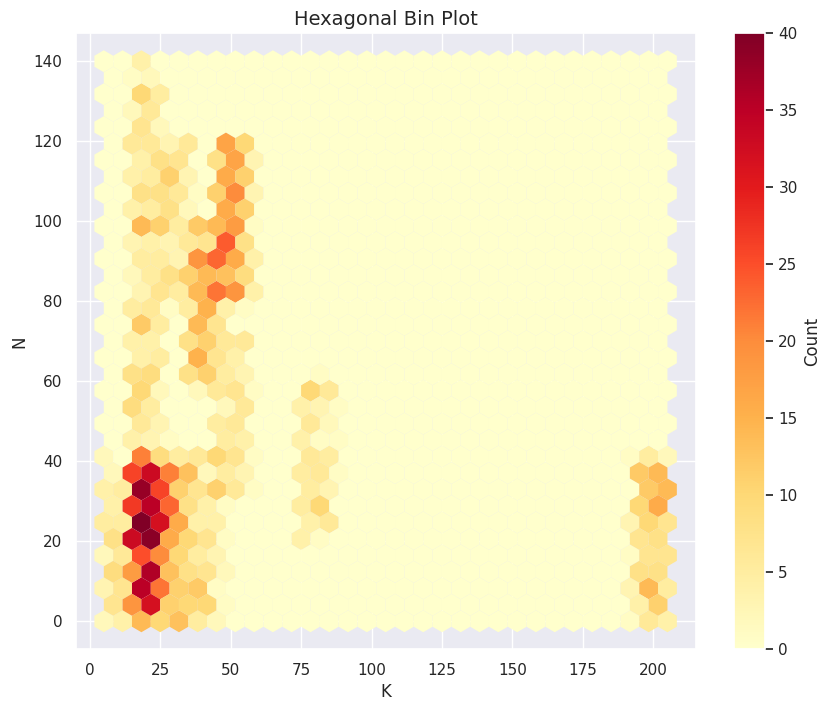

In [81]:

# hexagonal bin plot
fig, ax = plt.subplots(figsize=(10, 8))
hb = ax.hexbin(df["K"], df["N"], gridsize=30, cmap='YlOrRd', edgecolors='none')
ax.set_xlabel('K', fontsize=12)
ax.set_ylabel('N', fontsize=12)
ax.set_title('Hexagonal Bin Plot', fontsize=14)

# Adding a colorbar
cb = fig.colorbar(hb)
cb.set_label('Count', fontsize=12)

plt.show()


Above is a two-dimensional histogram that shows the frequency of observations in a hexagonal grid. This helps us to identify patterns in the data and for visualizing the distribution of two variables.

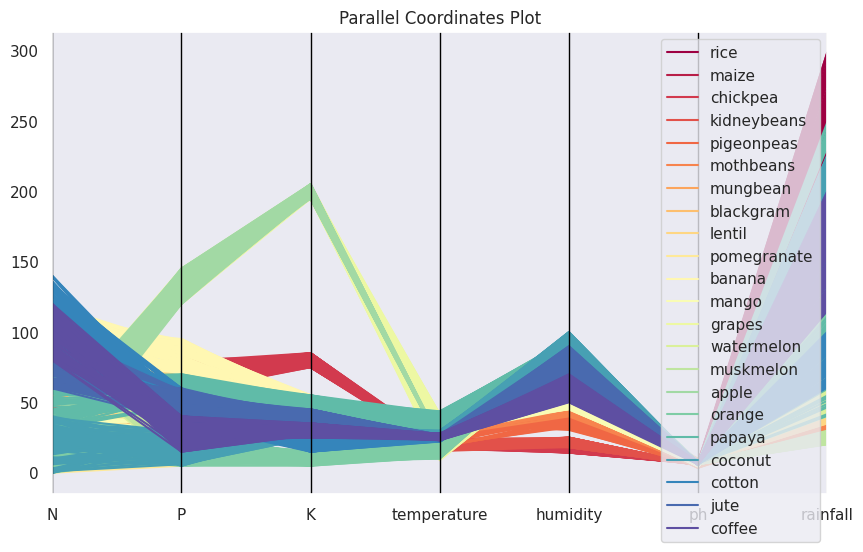

In [107]:
from pandas.plotting import parallel_coordinates

df_temp=df.copy()
# Set the 'label' column as the class labels
class_labels = df_temp.pop('label')
df_temp['class'] = class_labels

# Plot the parallel coordinates plot
plt.figure(figsize=(10,6))
parallel_coordinates(df_temp, 'class', colormap=plt.get_cmap('Spectral'))
plt.title('Parallel Coordinates Plot')
plt.show()


Above parallel coordinates plot shows the relationship between the different attributes (columns) of our data, and how they relate to the class labels. The class labels are represented by different colors in the above plot. We can see how these values for each attribute change as we move from left to right along the plot, and also how they relate to the class labels. 

Attributes that are similar or related to each other will have similar patterns in the plot, while attributes that are different or unrelated will have different patterns.

#N-P-K attribute comparision betwwen differnt crops 

In [35]:
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary

K       N       P   humidity        ph    rainfall  \
label                                                                  
apple        199.89   20.80  134.22  92.333383  5.929663  112.654779   
banana        50.05  100.23   82.01  80.358123  5.983893  104.626980   
blackgram     19.24   40.02   67.47  65.118426  7.133952   67.884151   
chickpea      79.92   40.09   67.79  16.860439  7.336957   80.058977   
coconut       30.59   21.98   16.93  94.844272  5.976562  175.686646   
coffee        29.94  101.20   28.74  58.869846  6.790308  158.066295   
cotton        19.56  117.77   46.24  79.843474  6.912675   80.398043   
grapes       200.11   23.18  132.53  81.875228  6.025937   69.611829   
jute          39.99   78.40   46.86  79.639864  6.732778  174.792798   
kidneybeans   20.05   20.75   67.54  21.605357  5.749411  105.919778   
lentil        19.41   18.77   68.36  64.804785  6.927932   45.680454   
maize         19.79   77.76   48.44  65.092249  6.245190   84.766988   
mango         29.92   20.07   27.18  50.156573  5.766373   94.704515   
mothbeans     20.23   21.44   48.01  53.160418  6.831174   51.198487   
mungbean      19.87   20.99   47.28  85.499975  6.723957   48.403601   
muskmelon     50.08  100.32   17.72  92.342802  6.358805   24.689952   
orange        10.01   19.58   16.55  92.170209  7.016957  110.474969   
papaya        50.04   49.88   59.05  92.403388  6.741442  142.627839   
pigeonpeas    20.29   20.73   67.73  48.061633  5.794175  149.457564   
pomegranate   40.21   18.87   18.75  90.125504  6.429172  107.528442   
rice          39.87   79.89   47.58  82.272822  6.425471  236.181114   
watermelon    50.22   99.42   17.00  85.160375  6.495778   50.786219   

             temperature  
label                     
apple          22.630942  
banana         27.376798  
blackgram      29.973340  
chickpea       18.872847  
coconut        27.409892  
coffee         25.540477  
cotton         23.988958  
grapes         23.849575  
jute           24.958376  
kidneybeans    20.115085  
lentil         24.509052  
maize          22.389204  
mango          31.208770  
mothbeans      28.194920  
mungbean       28.525775  
muskmelon      28.663066  
orange         22.765725  
papaya         33.723859  
pigeonpeas     27.741762  
pomegranate    21.837842  
rice           23.689332  
watermelon     25.591767

From crop summary data, we can observe that:

* The crops vary significantly in terms of their nutrient requirements, with nitrogen (N), phosphorous (P), and potassium (K) levels differing by a wide margin between different crops.

* Humidity seems to be a significant factor for most crops, with values ranging from 16.86 for chickpeas to 94.84 for coconut.

* The pH level of the soil also varies between crops, with values ranging from 5.75 for kidney beans to 7.34 for chickpeas.

* Rainfall is an important factor, with values ranging from 45.68 for lentils to 236.18 for rice.

* Temperature also seems to have a noticeable impact on crop yield, with values ranging from 18.87 for pomegranates to 134.22 for phosphorous in apple.

* Some crops, like coconut and muskmelon, require very specific conditions, while others, like maize and cotton, are relatively tolerant of different environmental factors.

Overall, above crop summary data suggests that different crops have varying nutrient and environmental requirements, and that understanding these requirements is crucial for successful crop cultivation.







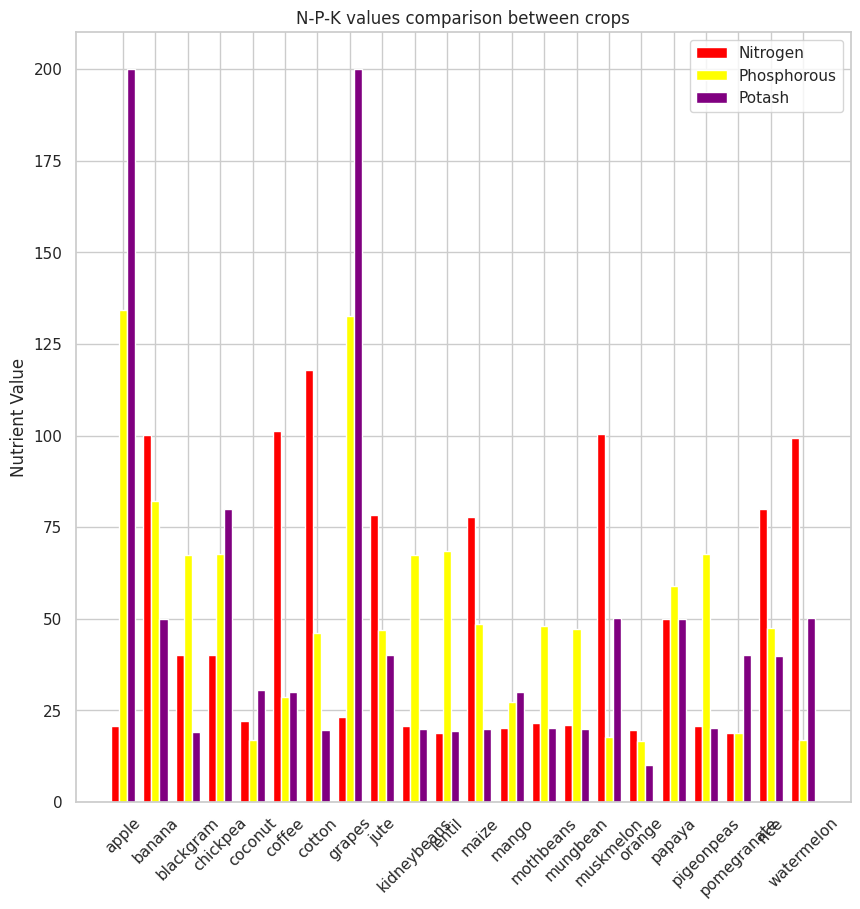

In [205]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

# Set x values as the index of crop_summary DataFrame
x = np.arange(len(crop_summary.index))

# Define width of each bar
width = 0.25

# Plot the bars for each nutrient
ax.bar(x - width, crop_summary['N'], width, label='Nitrogen', color='red')
ax.bar(x, crop_summary['P'], width, label='Phosphorous', color='yellow')
ax.bar(x + width, crop_summary['K'], width, label='Potash', color='purple')

# Set x-tick labels as the index of crop_summary DataFrame
ax.set_xticks(x)
ax.set_xticklabels(crop_summary.index, rotation=45)

# Set y label
ax.set_ylabel('Nutrient Value')

# Set title and legend
ax.set_title('N-P-K values comparison between crops')
ax.legend()

plt.show()


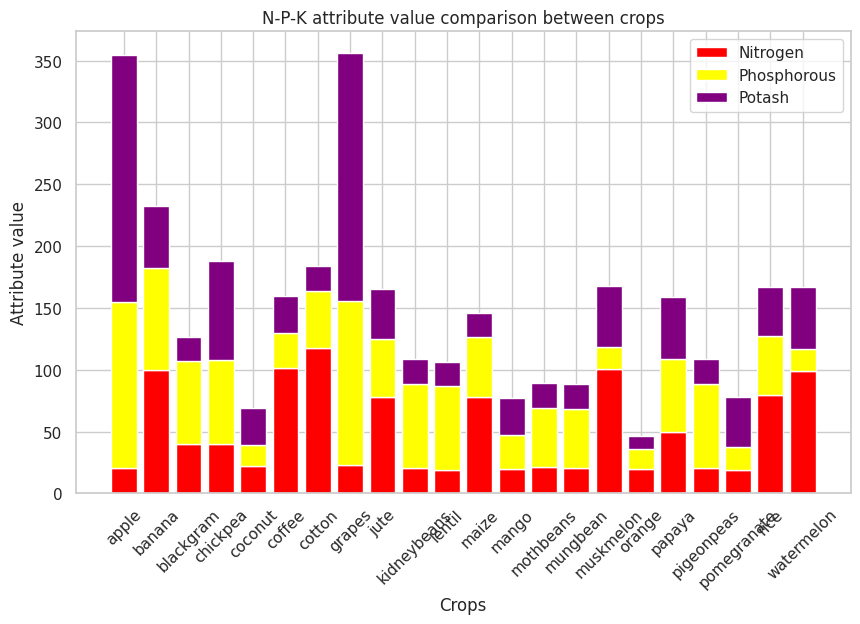

In [208]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(crop_summary.index, crop_summary['N'], label='Nitrogen', color='red')
ax.bar(crop_summary.index, crop_summary['P'], bottom=crop_summary['N'], label='Phosphorous', color='yellow')
ax.bar(crop_summary.index, crop_summary['K'], bottom=crop_summary['P'] + crop_summary['N'], label='Potash', color='purple')

ax.set_title('N-P-K attribute value comparison between crops')
ax.set_xlabel('Crops')
ax.set_ylabel('Attribute value')
ax.tick_params(axis='x', labelrotation=45)
ax.legend()

plt.show()



Above plot shows that

*   apple and grapes crops need high potash
*   lentil and pomegranate need the lowest nitrogen
*   apple and grapes need the highest phosphorus
*   coconut ,orange and watermelon need the lowest phosphorus



#Checking the correlation between each attributes

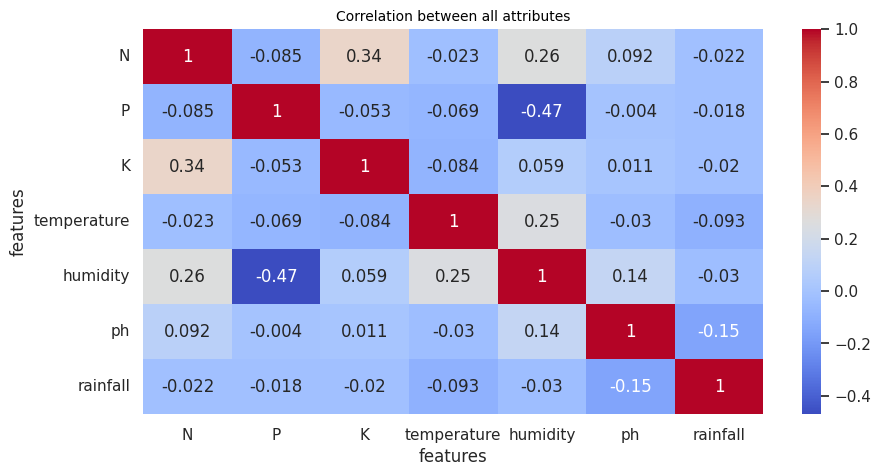

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df_clean.corr(), annot=True,cmap='coolwarm')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between all attributes', fontsize = 10, c='black')
plt.show()

In [33]:
corr_matrix = df_clean.corr()
corr_matrix

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.084996  0.343172    -0.022925  0.263791  0.091578   
P           -0.084996  1.000000 -0.052944    -0.068690 -0.470329 -0.003966   
K            0.343172 -0.052944  1.000000    -0.084430  0.059263  0.010826   
temperature -0.022925 -0.068690 -0.084430     1.000000  0.247642 -0.030254   
humidity     0.263791 -0.470329  0.059263     0.247642  1.000000  0.138226   
ph           0.091578 -0.003966  0.010826    -0.030254  0.138226  1.000000   
rainfall    -0.021797 -0.017827 -0.020435    -0.093072 -0.030023 -0.152062   

             rainfall  
N           -0.021797  
P           -0.017827  
K           -0.020435  
temperature -0.093072  
humidity    -0.030023  
ph          -0.152062  
rainfall     1.000000

In [34]:
least_corr_var = corr_matrix.abs().sum().idxmin()

print("The least correlated variable is:", least_corr_var)

The least correlated variable is: rainfall


Looking at the above correlation matrix, we can see that:

*   Nitrogen (N) and Potassium (K) have a moderate positive correlation (0.34).
*   Phosphorous (P) and Rainfall have a weak negative correlation (-0.018).
*   None of the variables have a strong correlation with each other.


Therefore, we can conclude that the variables are not highly correlated with each other, and each variable contributes unique information to the dataset.

#ML MODELLING


In [132]:
X = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
Y = df['label']

In [133]:
acc = []
model = []

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state =41)

#KNN classifier

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train,y_train)

predicted_values = knn.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

KNN Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        27
   blackgram       0.94      1.00      0.97        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        26
        jute       0.86      1.00      0.93        19
 kidneybeans       1.00      1.00      1.00        24
      lentil       0.95      1.00      0.97        18
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        11
   mothbeans       1.00      0.97      0.98        30
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00 

In [178]:
score = cross_val_score(knn,X,Y,cv=5)
print('Cross validation score: ',score)
#Train Accuracy
knn_train_accuracy = knn.score(x_train,y_train)
print("knn_train_accuracy = ",knn.score(x_train,y_train))
#Test Accuracy
knn_test_accuracy = knn.score(x_test,y_test)
print("knn_test_accuracy = ",knn.score(x_test,y_test))

Cross validation score:  [0.97727273 0.98181818 0.97954545 0.97954545 0.97954545]
knn_train_accuracy =  0.9880681818181818
knn_test_accuracy =  0.9886363636363636


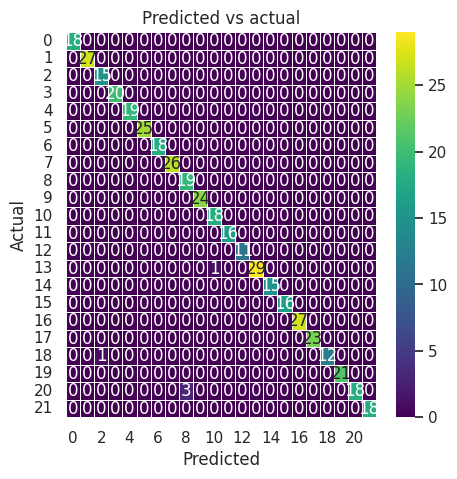

In [140]:
y_pred = knn.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

#Decision Tree

In [141]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  92.5
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        27
   blackgram       0.60      1.00      0.75        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        26
        jute       1.00      0.32      0.48        19
 kidneybeans       1.00      0.88      0.93        24
      lentil       0.82      1.00      0.90        18
       maize       0.67      0.75      0.71        16
       mango       1.00      1.00      1.00        11
   mothbeans       1.00      0.57      0.72        30
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00      1.00   

In [176]:
score = cross_val_score(DT, X, Y,cv=5)
print('Cross validation score: ',score)
#Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Cross validation score:  [0.93636364 0.90909091 0.91818182 0.87045455 0.93636364]
Training accuracy =  0.9363636363636364
Testing accuracy =  0.925


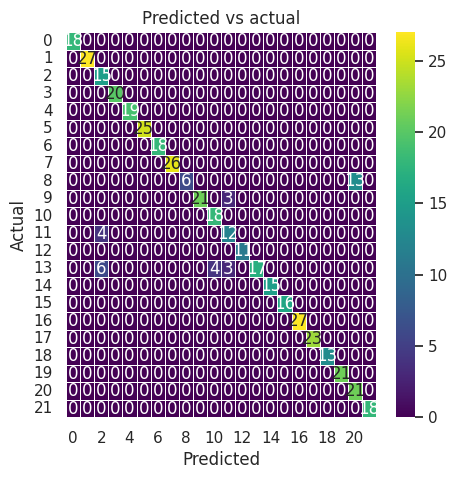

In [171]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

In [172]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


fig, axes = plt.subplots(figsize = (30,20), dpi=400)
plot_tree(DT, filled=True, fontsize=10)
plt.show()


#Random forest

In [173]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        27
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        26
        jute       0.95      0.95      0.95        19
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        11
   mothbeans       1.00      1.00      1.00        30
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00 

In [177]:
score = cross_val_score(RF,X,Y,cv=5)
print('Cross validation score: ',score)

#Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Cross validation score:  [0.99772727 0.99545455 0.99772727 0.99318182 0.98863636]
Training accuracy =  1.0
Testing accuracy =  0.9954545454545455


#Naive Bayes Classifier

In [179]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        27
   blackgram       1.00      1.00      1.00        15
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        25
      cotton       1.00      1.00      1.00        18
      grapes       1.00      1.00      1.00        26
        jute       0.94      0.89      0.92        19
 kidneybeans       1.00      1.00      1.00        24
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        16
       mango       1.00      1.00      1.00        11
   mothbeans       1.00      1.00      1.00        30
    mungbean       1.00      1.00      1.00        15
   muskmelon       1.00      1.00      1.00        16
      orange       1.00      1.00   

In [181]:
score = cross_val_score(NaiveBayes,X,Y,cv=5)
print('Cross validation score: ',score)

#Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Cross validation score:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]
Training accuracy =  0.9948863636363636
Testing accuracy =  0.9931818181818182


#XG Boost Classifier

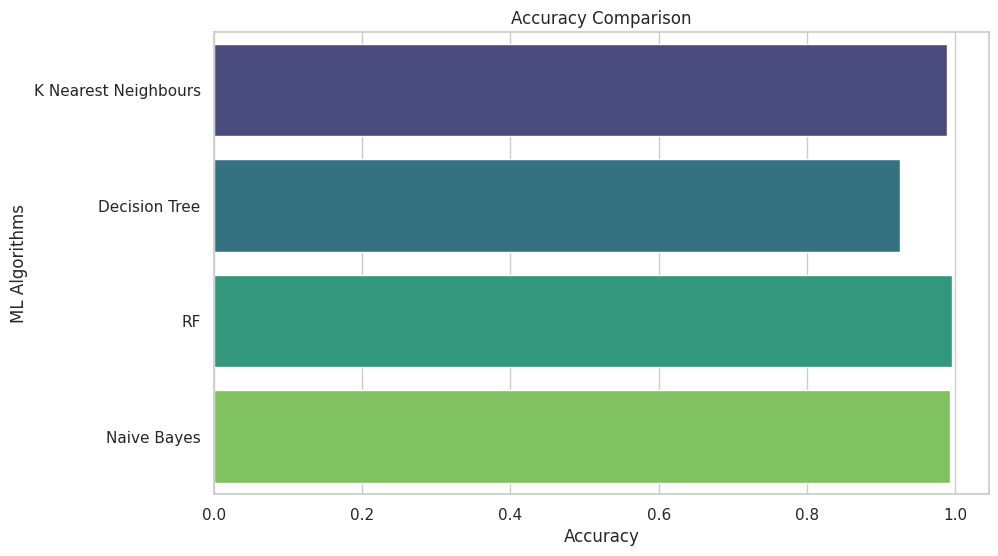

In [184]:
plt.figure(figsize=[10,6],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='viridis')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')